In [31]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import datasets
%matplotlib inline

In [32]:
X = pd.read_csv('titanic/train.csv')
x_test = pd.read_csv('titanic/test.csv')

In [33]:
X

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [34]:
X.shape

(891, 12)

In [35]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [36]:
X.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [37]:
X.describe(include='object')

Name   Sex  Ticket    Cabin Embarked
count                       891   891     891      204      889
unique                      891     2     681      147        3
top     Braund, Mr. Owen Harris  male  347082  B96 B98        S
freq                          1   577       7        4      644

In [38]:
X.corr(numeric_only=True)

PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000

In [39]:
duplicate_mask = X.duplicated()
X.loc[duplicate_mask].shape

(0, 12)

In [40]:
from ydata_profiling import ProfileReport

ProfileReport(X)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [41]:
X["Embarked"] = X["Embarked"].map(
    {"C": "Cherbourg", "Q": "Queenstown", "S": "Southampton"}
)

<Axes: >

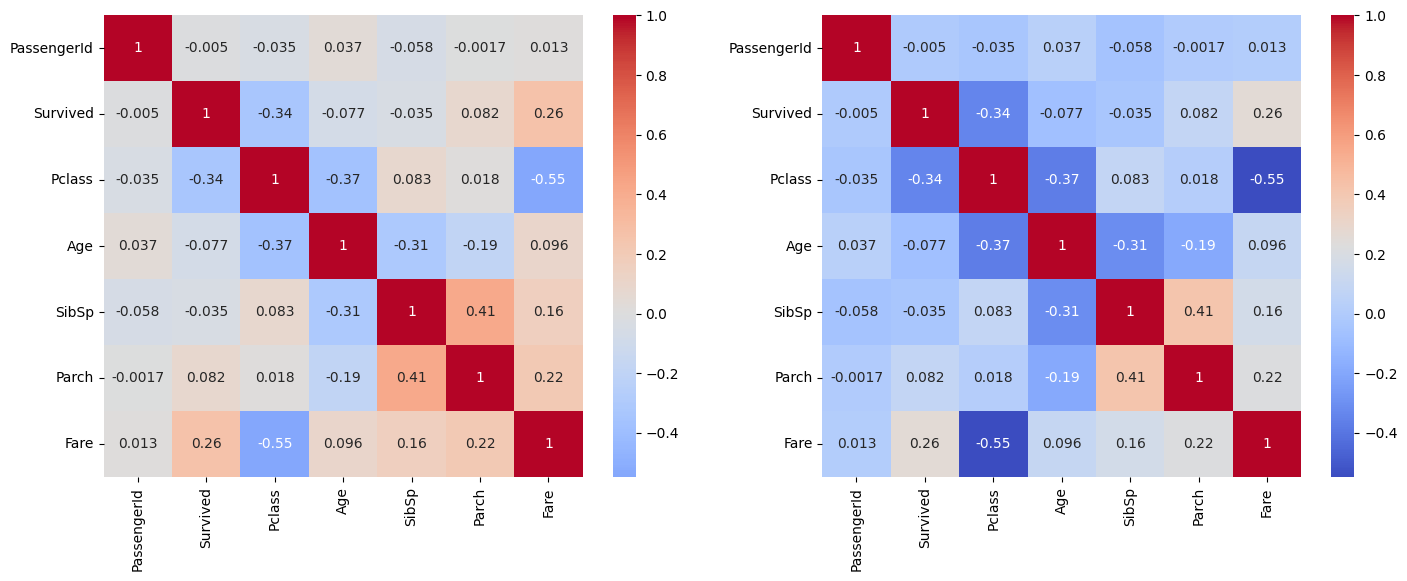

In [42]:
fig,axs=plt.subplots(ncols=2,figsize=(17,6))
sns.heatmap(X.corr(numeric_only=True), cmap='coolwarm',annot=True,center=0,ax=axs[0])
sns.heatmap(X.corr(numeric_only=True), cmap='coolwarm',annot=True,ax=axs[1])

<Axes: xlabel='Sex', ylabel='count'>

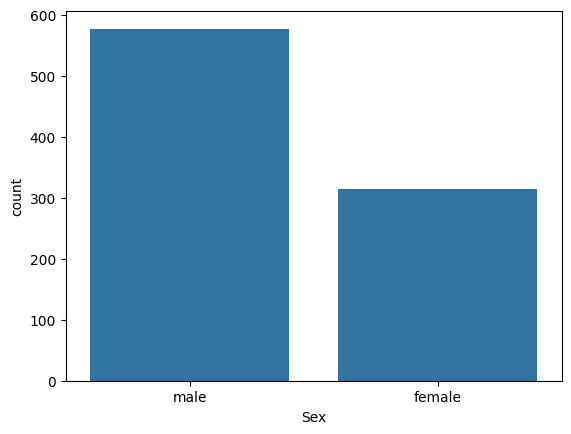

In [43]:
sns.countplot(x='Sex',data=X)

<Axes: xlabel='Sex', ylabel='Survived'>

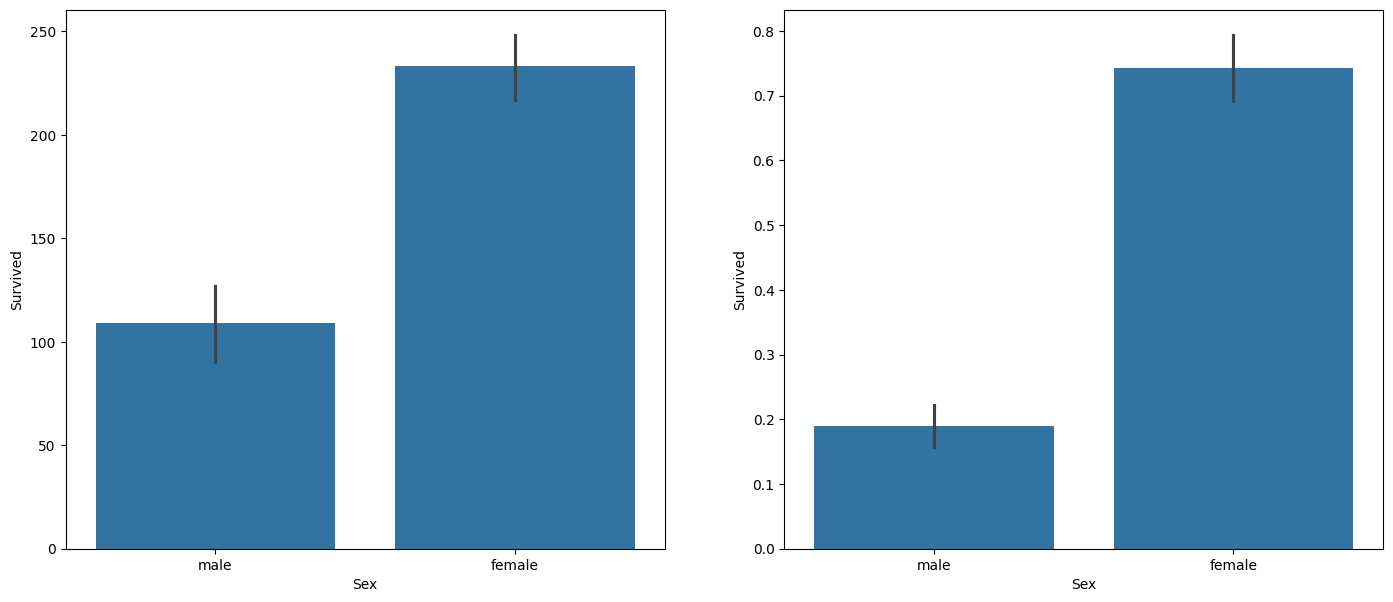

In [44]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(17, 7))
sns.barplot(y='Survived', x='Sex', data=X, estimator='sum', ax=axs[0])
sns.barplot(x='Sex', y='Survived', data=X, ax=axs[1])

In [45]:
X['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

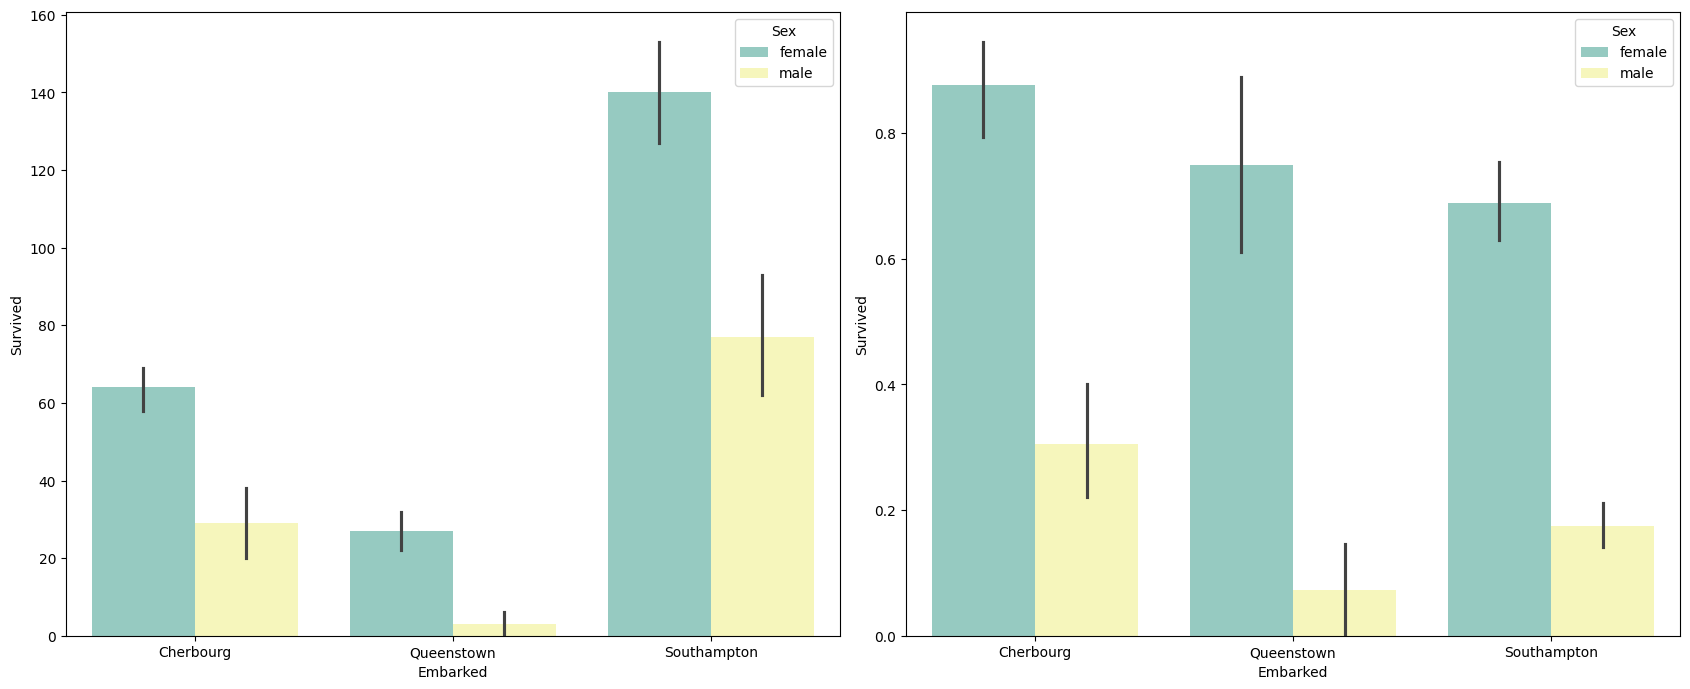

In [46]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(17, 7))
sns.barplot(
    x="Embarked",
    y="Survived",
    hue="Sex",
    data=X,
    ax=axs[0],
    estimator='sum',
    palette="Set3",
    hue_order=["female", "male"],
    order=X["Embarked"]
    .dropna()
    .sort_values(ascending=True, key=lambda x: x.str[0])
    .unique(),
)
# sns.barplot(x='Embarked',y='Survived',hue='Sex',data=X.groupby(by=['Embarked','Sex']).agg(func={'Survived':'mean'}),ax=axs[0][1])
sns.barplot(
    x="Embarked",
    y="Survived",
    hue="Sex",
    data=X,
    ax=axs[1],
    palette="Set3",
    hue_order=["female", "male"],
    order=X["Embarked"]
    .dropna()
    .sort_values(ascending=True, key=lambda x: x.str[0])
    .unique(),
)
plt.tight_layout()

<Axes: xlabel='Pclass', ylabel='Survived'>

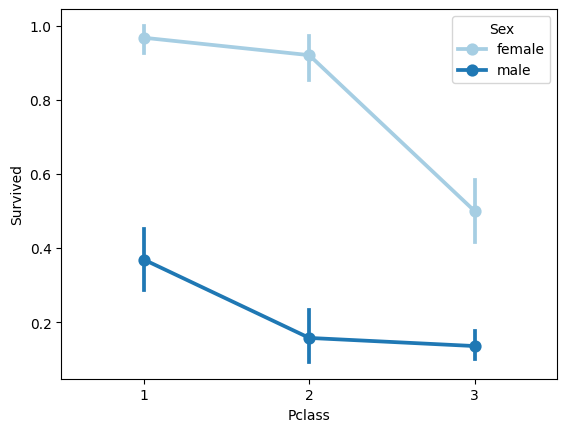

In [47]:
sns.pointplot(x='Pclass',y='Survived',hue='Sex',palette='Paired',data=X)

In [48]:
def simplify_ages(df: pd.DataFrame) -> pd.DataFrame:
    df["Age"] = df["Age"].fillna(-0.5)
    bins = (
        (-1, 0, 5, 12, 18, 25, 35, 60, 120)
        if df["Age"].max() < 120
        else (-1, 0, 5, 12, 18, 25, 35, 60, 120, df["Age"].max())
    )
    labels = (
        [
            "Unknown",
            "Baby",
            "Child",
            "Teenager",
            "Young",
            "Young Adult",
            "Adult",
            "Senior",
        ]
        if df["Age"].max() < 120
        else [
            "Unknown",
            "Baby",
            "Child",
            "Teenager",
            "Young",
            "Young Adult",
            "Adult",
            "Senior",
            "Unknown",
        ]
    )
    categories = pd.cut(df["Age"], bins, labels=labels)
    df.Age = categories
    return df


def simplify_cabins(df):
    df.Cabin = df.Cabin.fillna('N')
    df.Cabin = df.Cabin.apply(lambda x: x[0])
    return df


def simplify_fares(df):
    df.Fare = df.Fare.fillna(-0.5)
    bins = (-1, 0, 8, 15, 31, 700)
    group_names = ['Unknown', 'Low', 'Economical', 'High', 'Very High']
    categories = pd.cut(df.Fare, bins, labels=group_names)
    df.Fare = categories
    return df


def drop_features(df):
    return df.drop(['Ticket', 'Name'], axis=1)


def transform_features(df):
    df = simplify_ages(df)
    df = simplify_cabins(df)
    df = simplify_fares(df)
    df = drop_features(df)
    return df

In [49]:

X = transform_features(X)
x_test = transform_features(x_test)

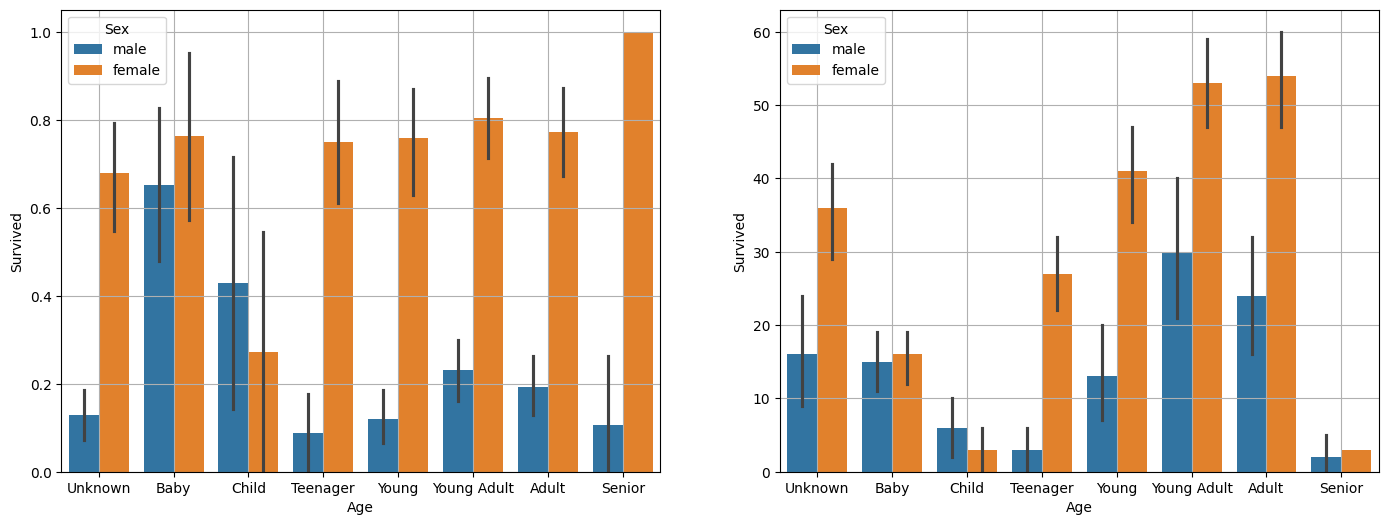

In [50]:
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(17, 6))
sns.barplot(x="Age", y="Survived", hue="Sex", data=X, ax=axs[0])
sns.barplot(x="Age", y="Survived", hue="Sex",
            estimator='sum', data=X, ax=axs[1])
axs[0].grid()
axs[1].grid()

<Axes: xlabel='Fare', ylabel='Survived'>

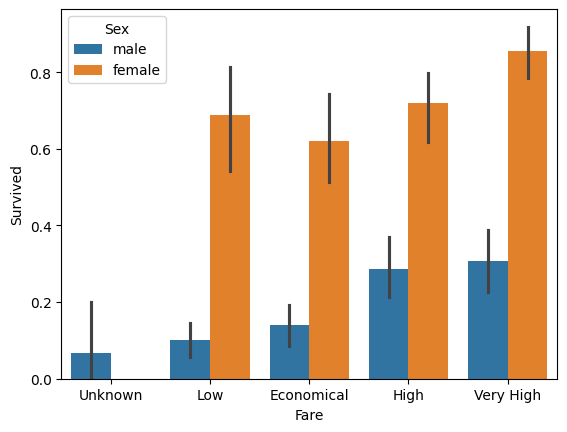

In [51]:
sns.barplot(x="Fare", y="Survived", hue="Sex", data=X)

<Axes: xlabel='Embarked', ylabel='count'>

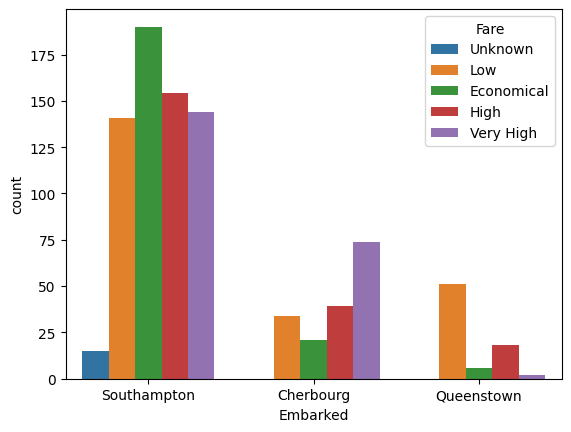

In [52]:
sns.countplot(x='Embarked',hue='Fare', data=X)

In [53]:
from sklearn.model_selection import train_test_split

X_all=X.drop(['Survived', 'PassengerId'], axis=1)
y=X['Survived']

X_train,X_test,y_train,y_test=train_test_split(X_all,y,test_size=0.2,shuffle=True,random_state=10)

In [54]:
X_train['Embarked'] = X_train['Embarked'].fillna(X_train['Embarked'].mode()[0])

In [55]:
y_train

57     0
717    1
431    1
633    0
163    0
      ..
369    1
320    0
527    0
125    1
265    0
Name: Survived, Length: 712, dtype: int64

In [56]:
from sklearn import preprocessing
def encode_features(df_train, df_test):
    features = ['Fare', 'Cabin', 'Age', 'Sex','Embarked']
    df_combined = pd.concat([df_train[features], df_test[features]])
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_combined[feature])
        df_train[feature] = le.transform(df_train[feature])
        df_test[feature] = le.transform(df_test[feature])
    return df_train, df_test
    
data_train, data_test = encode_features(X_train, X_test)
data_train.head()


Pclass  Sex  Age  SibSp  Parch  Fare  Cabin  Embarked
57        3    1    7      0      0     2      7         0
717       2    0    7      0      0     0      4         2
431       3    0    5      1      0     1      7         2
633       1    1    5      0      0     3      7         2
163       3    1    4      0      0     0      7         2

<Axes: >

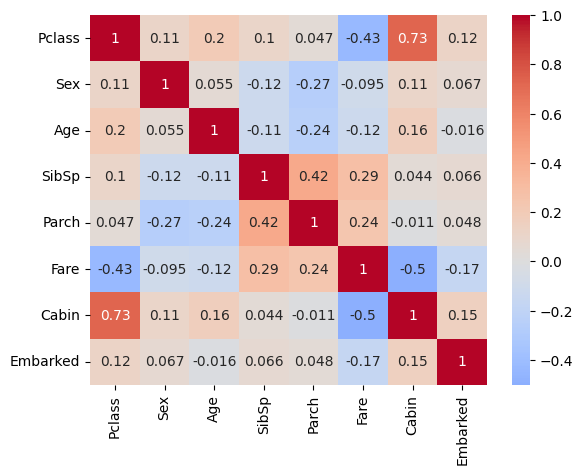

In [57]:
sns.heatmap(X_train.corr(),cmap='coolwarm',center=0,annot=True)

In [58]:
X_test,y_test

(     Pclass  Sex  Age  SibSp  Parch  Fare  Cabin  Embarked
 590       3    1    7      0      0     2      7         2
 131       3    1    6      0      0     2      7         2
 628       3    1    7      0      0     2      7         2
 195       1    0    0      0      0     4      1         0
 230       1    0    7      1      0     4      2         2
 ..      ...  ...  ...    ...    ...   ...    ...       ...
 456       1    1    3      0      0     1      4         2
 191       2    1    6      0      0     0      7         2
 603       3    1    0      0      0     0      7         2
 94        3    1    0      0      0     2      7         2
 766       1    1    5      0      0     4      7         0
 
 [179 rows x 8 columns],
 590    0
 131    0
 628    0
 195    1
 230    1
       ..
 456    0
 191    0
 603    0
 94     0
 766    0
 Name: Survived, Length: 179, dtype: int64)

In [59]:
# from sklearn import tree
# from sklearn import svm
# from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import GaussianNB
# from sklearn.ensemble import RandomForestClassifier



# svmachine = svm.SVC()
# dtree = tree.DecisionTreeClassifier()
# logreg=LogisticRegression()
# nbayes = GaussianNB()
# forest=RandomForestClassifier(n_estimators=150)


# dtree.fit(X_train, y_train)
# svmachine.fit(X_train, y_train)
# logreg.fit(X_train,y_train)
# nbayes.fit(X_train, y_train)
# forest.fit(X_train, y_train)


# y_pred1=dtree.predict(X_test)
# y_pred2=svmachine.predict(X_test)
# y_pred3=logreg.predict(X_test)
# y_pred4=nbayes.predict(X_test)
# y_pred5=forest.predict(X_test)

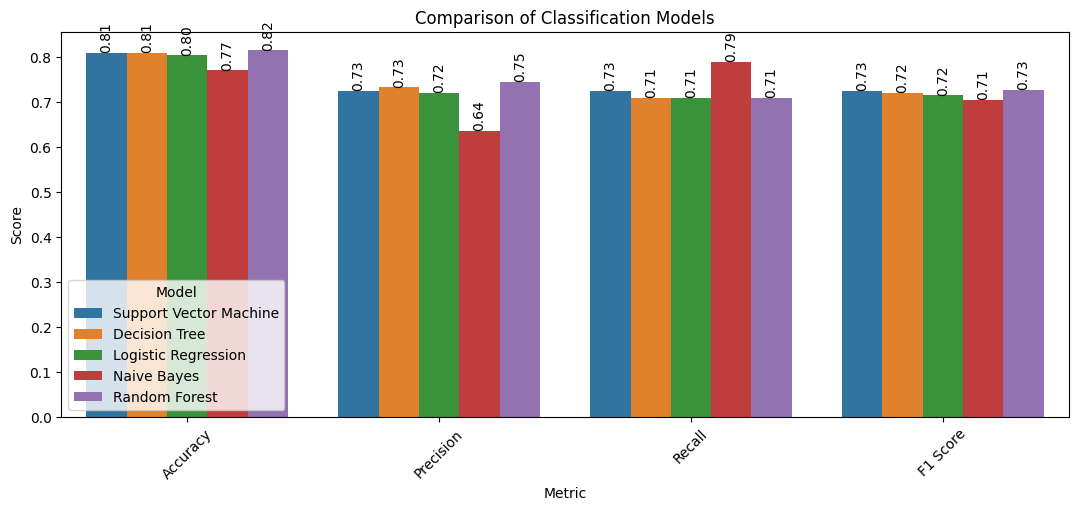

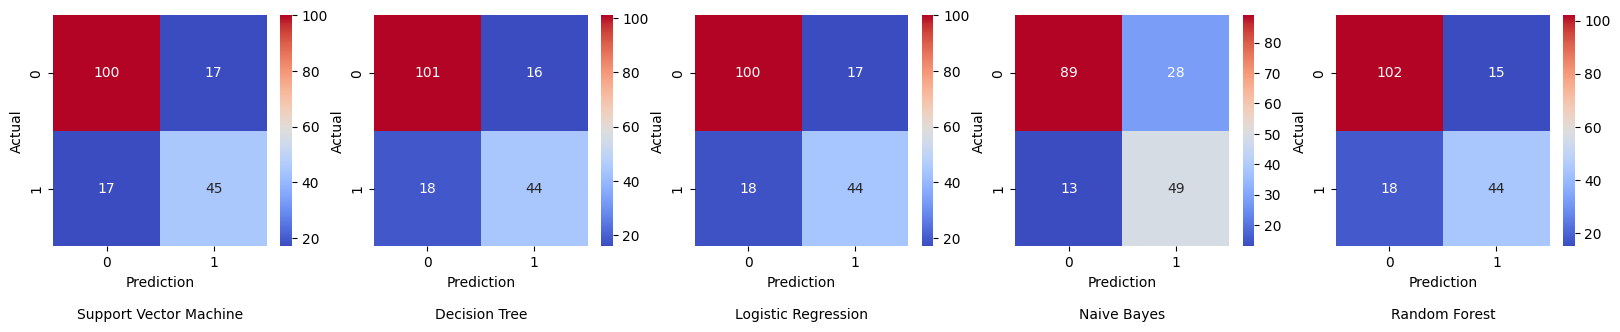

In [98]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn import tree
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

models = {
    'Support Vector Machine': svm.SVC(),
    'Decision Tree': tree.DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Random Forest': RandomForestClassifier(n_estimators=150, random_state=42)
}

# Store the performance metrics
metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': [],
    'Confusion Matrix':[]
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, )
    recall = recall_score(y_test, y_pred, )
    f1 = f1_score(y_test, y_pred,)
    metrics['Confusion Matrix'].append(confusion_matrix(y_test, y_pred))
    metrics['Model'].append(name)
    metrics['Accuracy'].append(accuracy)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1 Score'].append(f1)


metrics_df = pd.DataFrame(metrics)

metrics_melted = metrics_df.melt(id_vars='Model', value_vars=['Accuracy', 'Precision', 'Recall', 'F1 Score'], var_name='Metric', value_name='Value')

plt.figure(figsize=(13, 5))
bars = sns.barplot(data=metrics_melted, x='Metric', y='Value', hue='Model')
for container in bars.containers:
    plt.bar_label(container, fmt='%.2f', label_type='edge', rotation=90)
plt.title('Comparison of Classification Models')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Model')
plt.show()
fig,axs=plt.subplots(ncols=5,figsize=(20,3))
for index,item in enumerate(metrics['Confusion Matrix']):
    sns.heatmap(item,cmap='coolwarm',ax=axs[index],annot=True,fmt='d')
    axs[index].set_xlabel('Prediction'+'\n\n'+metrics['Model'][index])
    axs[index].set_ylabel('Actual')

In [ ]:
from sklearn.metrics import accuracy_score

print('Svm : ',accuracy_score(y_test, y_pred2))
print('D tree : ',accuracy_score(y_test, y_pred1))
print('Log Reg : ',accuracy_score(y_test, y_pred3))
print('Naive Bayes : ',accuracy_score(y_test, y_pred4))
print('Forest: ',accuracy_score(y_test, y_pred5))

Svm :  0.8100558659217877
D tree :  0.8100558659217877
Log Reg :  0.8044692737430168
Naive Bayes :  0.770949720670391
Forest:  0.8212290502793296


In [ ]:
{
'svm':svmachine.score(X_test, y_test),
'dtree':dtree.score(X_test, y_test),
'logistic':logreg.score(X_test, y_test),
'naive bayes':nbayes.score(X_test, y_test)
}

{'svm': 0.8100558659217877,
 'dtree': 0.8100558659217877,
 'logistic': 0.8044692737430168,
 'naive bayes': 0.770949720670391}

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       117
           1       0.73      0.71      0.72        62

    accuracy                           0.81       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179

